In [1]:
###################################################
#### CODE TO INVESTIGATE THE URBAN COOL ISLAND ####
#### WHERE THE LINEAR MODELS ARE NOT EFFECTIVE ####
###################################################

#import required packages
import os
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import earthpy as et
import pandas as pd
import pickle
import random           #for test city selection
#for displaying the cities on map
import cartopy
import cartopy.crs as ccrs
import matplotlib as mpl


#read in the city info table
os.chdir(os.path.join(et.io.HOME, 'Documents', 'Python_Scripts', 'PROJECT','CITY_ADD_2022_09'))
CITY_COUNTRY_lat_lon = pd.read_excel('CITY_COUNTRY_lat_lon.xlsx', index_col=None)

#read the table with all variables in as pickle
os.chdir(os.path.join(et.io.HOME, 'Documents', 'Python_Scripts', 'PROJECT','UHI_Project_Pickle_Files','All_cities'))   
with open('aqua_all_monthly_data_df2.pkl', 'rb') as f:
    all_monthly_data_df = pickle.load(f)
    
    

C:\Users\UEA_Laptop\.conda\envs\suhienv\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Users\UEA_Laptop\.conda\envs\suhienv\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


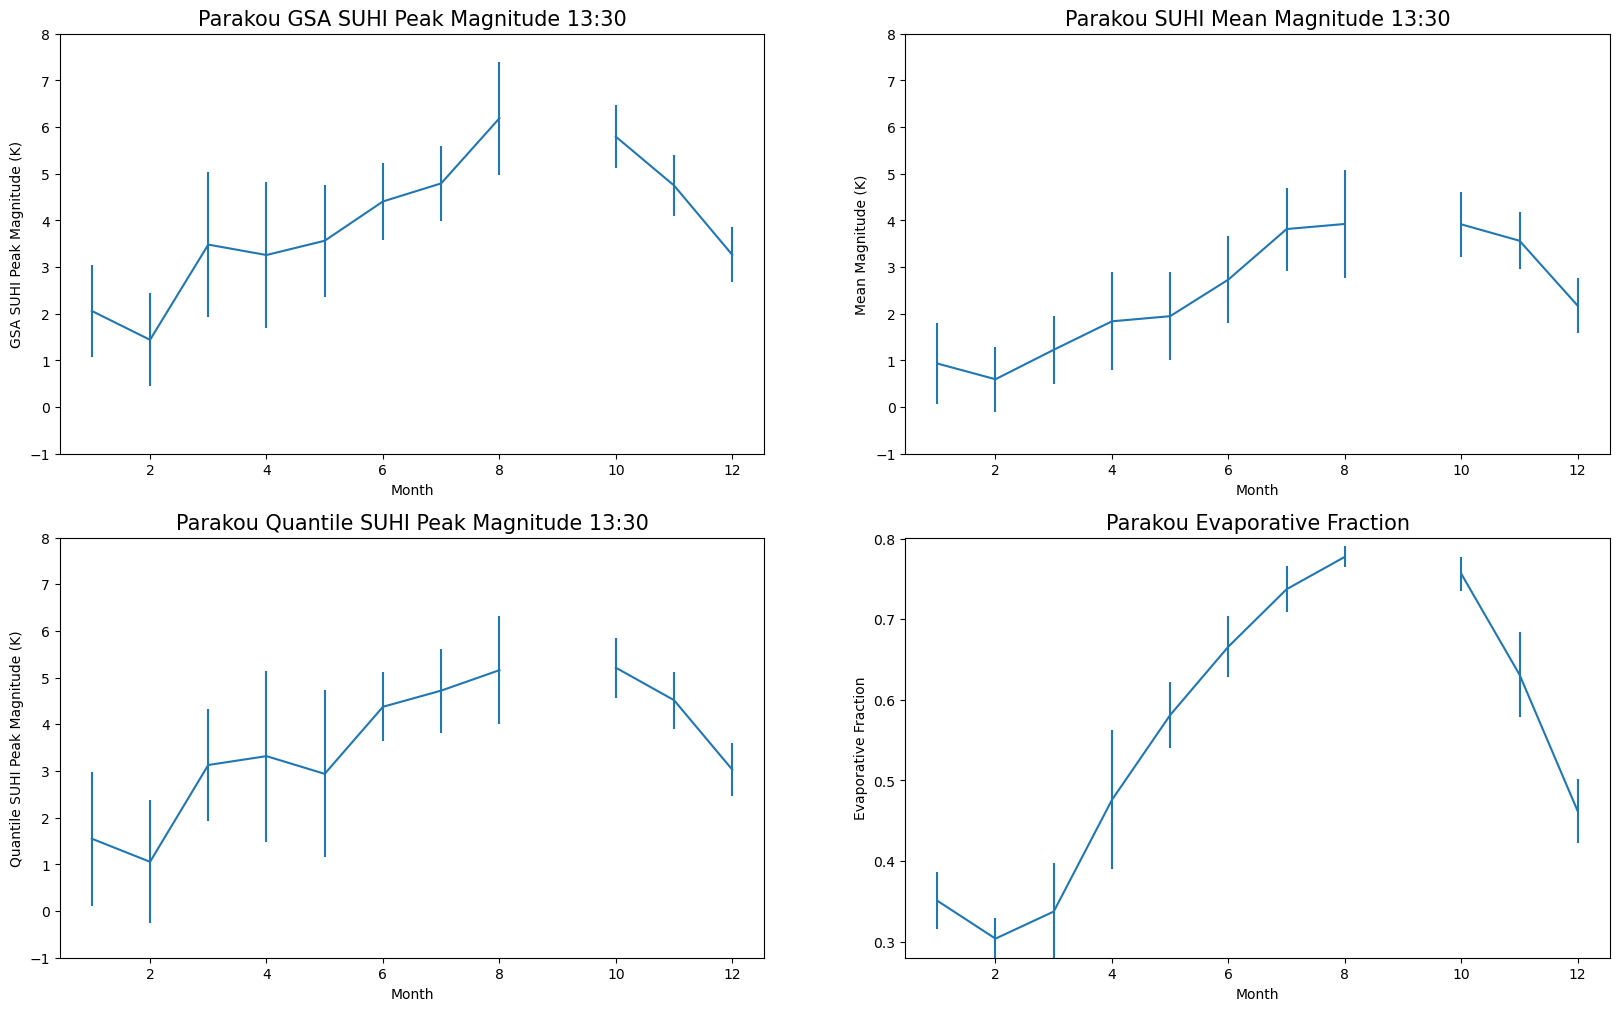

In [305]:
# Create scatter plots #
City = 'Parakou'

SUHI_PEAK_GSA = list(all_monthly_data_df[(all_monthly_data_df['Overpass']== '13:30')&(all_monthly_data_df['City']== City
                                                                        )].groupby(['month']).mean().SUHI_PEAK_GSA)
SUHI_PEAK_GSA_STD = list(all_monthly_data_df[(all_monthly_data_df['Overpass']== '13:30')&(all_monthly_data_df['City']== City
                                                                        )].groupby(['month']).std().SUHI_PEAK_GSA)

SUHI_MEAN = list(all_monthly_data_df[(all_monthly_data_df['Overpass']== '13:30')&(all_monthly_data_df['City']== City
                                                                        )].groupby(['month']).mean().SUHI_MEAN)
SUHI_MEAN_STD = list(all_monthly_data_df[(all_monthly_data_df['Overpass']== '13:30')&(all_monthly_data_df['City']== City
                                                                        )].groupby(['month']).std().SUHI_MEAN)

SUHI_PEAK_QUANTILE = list(all_monthly_data_df[(all_monthly_data_df['Overpass']== '13:30')&(all_monthly_data_df['City']== City
                                                                        )].groupby(['month']).mean().SUHI_PEAK_QUANTILE)
SUHI_PEAK_QUANTILE_STD = list(all_monthly_data_df[(all_monthly_data_df['Overpass']== '13:30')&(all_monthly_data_df['City']== City
                                                                        )].groupby(['month']).std().SUHI_PEAK_QUANTILE)

EF = list(all_monthly_data_df[(all_monthly_data_df['Overpass']== '13:30')&(all_monthly_data_df['City']== City
                                                                        )].groupby(['month']).mean().EF)
EF_STD = list(all_monthly_data_df[(all_monthly_data_df['Overpass']== '13:30')&(all_monthly_data_df['City']== City
                                                                        )].groupby(['month']).std().EF)

#check for/ insert missing months as nans
mons = list(set(all_monthly_data_df[(all_monthly_data_df['Overpass']== '13:30')&(all_monthly_data_df['City']== City
                                                                        )].month))
all_months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
if len(SUHI_PEAK_GSA) != 12:
    # find which is the missing month and add it into the df with nan values
    missing_month = [i for i in all_months if i not in mons]
    SUHI_PEAK_GSA.insert(missing_month[0],np.nan)
    SUHI_PEAK_GSA_STD.insert(missing_month[0],np.nan)
    SUHI_MEAN.insert(missing_month[0],np.nan)
    SUHI_MEAN_STD.insert(missing_month[0],np.nan)
    SUHI_PEAK_QUANTILE.insert(missing_month[0],np.nan)
    SUHI_PEAK_QUANTILE_STD.insert(missing_month[0],np.nan)
    EF.insert(missing_month[0],np.nan)
    EF_STD.insert(missing_month[0],np.nan)

fig, axes = plt.subplots(nrows = 2,ncols = 2, figsize=(20, 12))

axes[0,0].errorbar(x = range(1,13), y = SUHI_PEAK_GSA, yerr = SUHI_PEAK_GSA_STD)
axes[0,0].set_title('{} GSA SUHI Peak Magnitude 13:30'.format(City))
axes[0,0].set(xlabel = 'Month', ylabel = 'GSA SUHI Peak Magnitude (K)')

axes[0,1].errorbar(x = range(1,13), y = SUHI_MEAN, yerr = SUHI_MEAN_STD)
axes[0,1].set_title('{} SUHI Mean Magnitude 13:30'.format(City))
axes[0,1].set(xlabel = 'Month', ylabel = 'Mean Magnitude (K)')

axes[1,0].errorbar(x = range(1,13), y = SUHI_PEAK_QUANTILE, yerr = SUHI_PEAK_QUANTILE_STD)
axes[1,0].set_title('{} Quantile SUHI Peak Magnitude 13:30'.format(City))
axes[1,0].set(xlabel = 'Month', ylabel = 'Quantile SUHI Peak Magnitude (K)')

axes[1,1].errorbar(x = range(1,13), y = EF, yerr = EF_STD)
axes[1,1].set_title('{} Evaporative Fraction'.format(City))
axes[1,1].set(xlabel = 'Month', ylabel = 'Evaporative Fraction')

axesmin = -1
axesmax = 8

axes[0,0].set_ylim([axesmin, axesmax])
axes[0,1].set_ylim([axesmin, axesmax])
axes[1,0].set_ylim([axesmin, axesmax])


#save figure as png
os.chdir(os.path.join(et.io.HOME, 'Documents', 'UEA','Urban_Heat', 'PROJECT','Writing_up','Meeting_Documents','2022',
                     '2022_11_11','UCI_examples'))   
plt.savefig('{}_seasonal_cycle.png'.format(City), bbox_inches = 'tight')

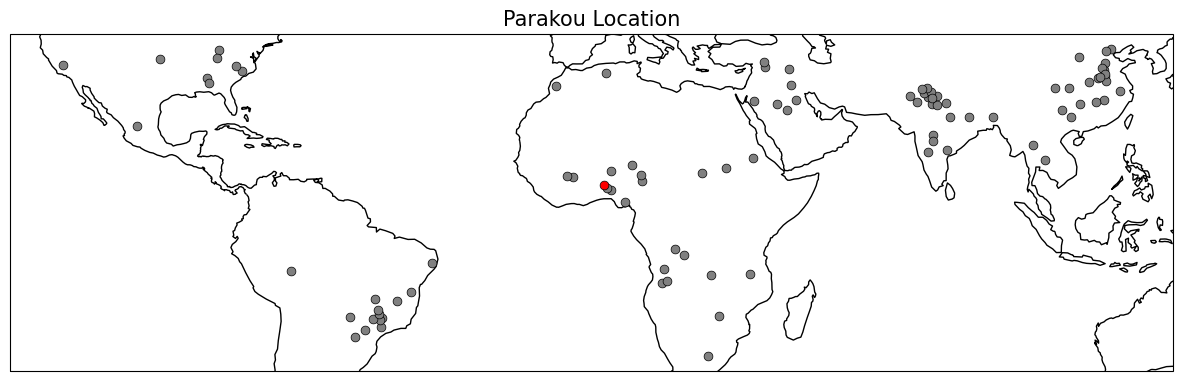

In [306]:
# Plot showing the RMSE for the individual cities

#plt.rc('font', size=35)          # controls default text sizes
plt.rc('axes', titlesize=15)     # fontsize of the axes title

fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection=ccrs.PlateCarree(), 
              title='{} Location'.format(City))
ax.coastlines()

other_city_lats = CITY_COUNTRY_lat_lon[CITY_COUNTRY_lat_lon.City != City].Lat.values
other_city_lons = CITY_COUNTRY_lat_lon[CITY_COUNTRY_lat_lon.City != City].Lon.values

city_lat = CITY_COUNTRY_lat_lon[CITY_COUNTRY_lat_lon.City == City].Lat.values
city_lon = CITY_COUNTRY_lat_lon[CITY_COUNTRY_lat_lon.City == City].Lon.values

ax.scatter(other_city_lons, other_city_lats, zorder=5, c= 'grey', linewidths = 0.5, s =40,edgecolor = 'black')
ax.scatter(city_lon, city_lat, zorder=5, c= 'red', linewidths = 0.5, s =40,edgecolor = 'black')


#save figure as png
os.chdir(os.path.join(et.io.HOME, 'Documents', 'UEA','Urban_Heat', 'PROJECT','Writing_up','Meeting_Documents','2022',
                     '2022_11_11','UCI_examples'))   
plt.savefig('{}_location.png'.format(City), bbox_inches = 'tight')

In [53]:
#########################################
## Look at Bikaner and Buraydah albedo ##
#########################################
CITY_COUNTRY = 'BIKANER_INDIA'
City = 'Bikaner'

#read the table with all variables in as pickle
os.chdir(os.path.join(et.io.HOME, 'Documents', 'Python_Scripts', 'PROJECT','Albedo'))   
with open('albedo_info_{}.pkl'.format(CITY_COUNTRY), 'rb') as f:
    albedo_df = pickle.load(f)

os.chdir(os.path.join(et.io.HOME, 'Documents', 'Python_Scripts', 'PROJECT','Albedo'))   
with open('albedo_info_{}_2019.pkl'.format(CITY_COUNTRY), 'rb') as f:
    albedo_df_2 = pickle.load(f)
    

NameError: name 'Bikaner' is not defined

In [51]:
WSA_ALBEDO_R_MEAN = list(albedo_df[(albedo_df['qc_fail']== 0)].groupby(['Month']
                                                        ).mean(numeric_only = True).Albedo_WSA_shortwave_rural)
WSA_ALBEDO_R_STD = list(albedo_df[(albedo_df['qc_fail']== 0)].groupby(['Month']
                                                        ).std(numeric_only = True).Albedo_WSA_shortwave_rural)

WSA_ALBEDO_U_MEAN = list(albedo_df[(albedo_df['qc_fail']== 0)].groupby(['Month']
                                                        ).mean(numeric_only = True).Albedo_WSA_shortwave_urban)
WSA_ALBEDO_U_STD = list(albedo_df[(albedo_df['qc_fail']== 0)].groupby(['Month']
                                                        ).std(numeric_only = True).Albedo_WSA_shortwave_urban)

BSA_ALBEDO_R_MEAN = list(albedo_df[(albedo_df['qc_fail']== 0)].groupby(['Month']
                                                        ).mean(numeric_only = True).Albedo_BSA_shortwave_rural)
BSA_ALBEDO_R_STD = list(albedo_df[(albedo_df['qc_fail']== 0)].groupby(['Month']
                                                        ).std(numeric_only = True).Albedo_BSA_shortwave_rural)

BSA_ALBEDO_U_MEAN = list(albedo_df[(albedo_df['qc_fail']== 0)].groupby(['Month']
                                                        ).mean(numeric_only = True).Albedo_BSA_shortwave_urban)
BSA_ALBEDO_U_STD = list(albedo_df[(albedo_df['qc_fail']== 0)].groupby(['Month']
                                                        ).std(numeric_only = True).Albedo_BSA_shortwave_urban)


WSA_ALBEDO_R_MEAN.insert(5,np.nan)
WSA_ALBEDO_R_MEAN.insert(6,np.nan)
WSA_ALBEDO_R_MEAN.insert(7,np.nan)
WSA_ALBEDO_R_STD.insert(5,np.nan)
WSA_ALBEDO_R_STD.insert(6,np.nan)
WSA_ALBEDO_R_STD.insert(7,np.nan)

WSA_ALBEDO_U_MEAN.insert(5,np.nan)
WSA_ALBEDO_U_MEAN.insert(6,np.nan)
WSA_ALBEDO_U_MEAN.insert(7,np.nan)
WSA_ALBEDO_U_STD.insert(5,np.nan)
WSA_ALBEDO_U_STD.insert(6,np.nan)
WSA_ALBEDO_U_STD.insert(7,np.nan)

BSA_ALBEDO_R_MEAN.insert(5,np.nan)
BSA_ALBEDO_R_MEAN.insert(6,np.nan)
BSA_ALBEDO_R_MEAN.insert(7,np.nan)
BSA_ALBEDO_R_STD.insert(5,np.nan)
BSA_ALBEDO_R_STD.insert(6,np.nan)
BSA_ALBEDO_R_STD.insert(7,np.nan)

BSA_ALBEDO_U_MEAN.insert(5,np.nan)
BSA_ALBEDO_U_MEAN.insert(6,np.nan)
BSA_ALBEDO_U_MEAN.insert(7,np.nan)
BSA_ALBEDO_U_STD.insert(5,np.nan)
BSA_ALBEDO_U_STD.insert(6,np.nan)
BSA_ALBEDO_U_STD.insert(7,np.nan)

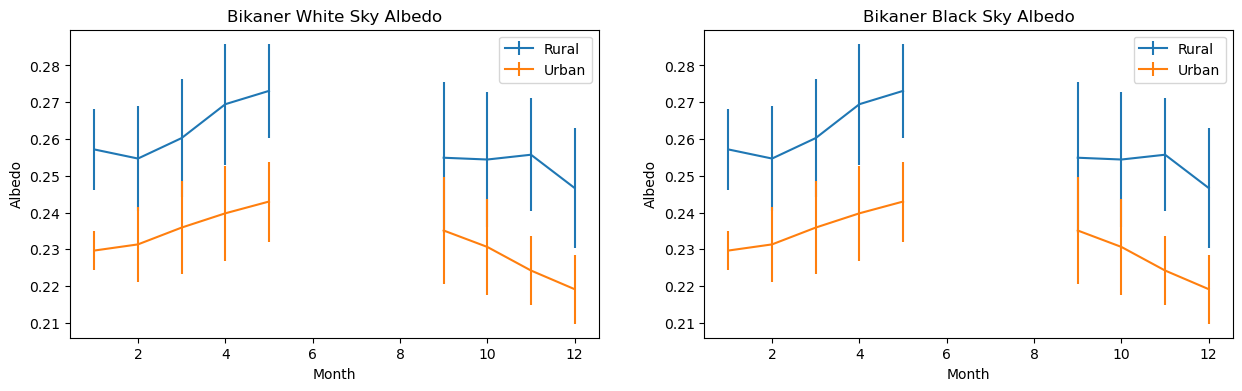

In [56]:
City = 'Bikaner'
fig, axes = plt.subplots(nrows = 1,ncols = 2, figsize=(15, 4))

axes[0].errorbar(x = range(1,13), y = WSA_ALBEDO_R_MEAN, yerr = WSA_ALBEDO_R_STD, label = 'Rural')
axes[0].errorbar(x = range(1,13), y = WSA_ALBEDO_U_MEAN, yerr = WSA_ALBEDO_U_STD, label = 'Urban')
axes[0].set_title('{} White Sky Albedo'.format(City))
axes[0].set(xlabel = 'Month', ylabel = 'Albedo')
axes[0].legend()

axes[1].errorbar(x = range(1,13), y = BSA_ALBEDO_R_MEAN, yerr = BSA_ALBEDO_R_STD, label = 'Rural')
axes[1].errorbar(x = range(1,13), y = BSA_ALBEDO_U_MEAN, yerr = BSA_ALBEDO_U_STD, label = 'Urban')
axes[1].set_title('{} Black Sky Albedo'.format(City))
axes[1].set(xlabel = 'Month', ylabel = 'Albedo')
axes[1].legend()

In [307]:
CITY_COUNTRY_lat_lon[CITY_COUNTRY_lat_lon.City == 'Bikaner']

,CITY_COUNTRY,City,Lat,Lon,City_Area,City_Bound_xmin,City_Bound_xmax,City_Bound_ymin,City_Bound_ymax,koppen_climate,...,eccen_2018,major_ax_2019,minor_ax_2019,ell_theta_2019,eccen_2019,major_ax_2020,minor_ax_2020,ell_theta_2020,eccen_2020,std_dev_elevation
18,BIKANER_INDIA,Bikaner,28.01667,73.3,108,-5000,11000,-7000,9000,BWh,...,0.61,5894.176506,4660.312175,0.795837,0.612251,5894.176506,4660.312175,0.795837,0.612251,30.867691


In [312]:
CITY_COUNTRY_lat_lon[CITY_COUNTRY_lat_lon.City == 'Buraydah'].mean_elevation_rural

28   NaN
Name: mean_elevation_rural, dtype: float64

In [311]:
for col in CITY_COUNTRY_lat_lon.columns:
    print(col)

CITY_COUNTRY
City
Lat
Lon
City_Area
City_Bound_xmin
City_Bound_xmax
City_Bound_ymin
City_Bound_ymax
koppen_climate
Local_epsg
mean_elevation_rural
mean_elevation_city
std_elevation_rural
std_elevation_city
max_lon
min_lon
max_lat
min_lat
Area_2000
Area_2001
Area_2002
Area_2003
Area_2004
Area_2005
Area_2006
Area_2007
Area_2008
Area_2009
Area_2010
Area_2011
Area_2012
Area_2013
Area_2014
Area_2015
City_length_2000
City_length_2001
City_length_2002
City_length_2003
City_length_2004
City_length_2005
City_length_2006
City_length_2007
City_length_2008
City_length_2009
City_length_2010
City_length_2011
City_length_2012
City_length_2013
City_length_2014
City_length_2015
city_width
city_height
Grid_Ref
population_2005
population_2010
population_2015
major_ax_2000
minor_ax_2000
ell_theta_2000
major_ax_2001
minor_ax_2001
ell_theta_2001
major_ax_2002
minor_ax_2002
ell_theta_2002
major_ax_2003
minor_ax_2003
ell_theta_2003
major_ax_2004
minor_ax_2004
ell_theta_2004
major_ax_2005
minor_ax_2005
ell_the